In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection

## Partie 1 : Réegression linèaire simple

In [436]:
#  advertising.scv dataset
data_advertising = pd.read_csv("data/advertising.csv")
data_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [437]:
data_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [438]:
# Initialization of variables (X, Y) : X=TV and Y=Sales
X = data_advertising['TV'].values
Y = data_advertising['Sales'].values

In [439]:
# Pourquoi il s’agit d’un probleme de regression
# 2. On cherche à prédire une valeur continue   (Sales)

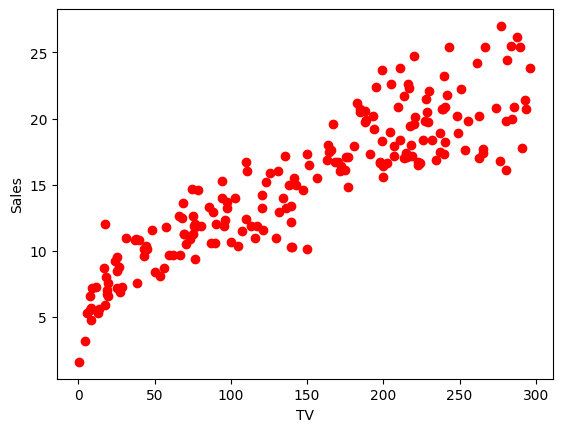

In [440]:
# Visualiser la base de donnees avec matplotlib.
plt.scatter(X,Y, c="r")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()
# On remarque que les données sont linéairement corrélées

In [441]:
# (80% pour la base d’apprentissage et 20% pour la base de test )
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [442]:
# Definir une fonction MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur theorique et la valeur reelle.
def MSE(X, y, W):
    error = y -  X @ W
    return np.mean(error**2)

# La MSE est une fonction de coût qui permet de mesurer la qualité d'un modèle de régression.
# Elle est définie comme la moyenne des carrés des erreurs de prédiction.
# Elle permet de mesurer la distance entre les valeurs prédites et les valeurs réelles.

In [443]:
# Definir la fonction Gradient(X,y,W).
def Gradient(X, y, W):
    error=y-X@W
    return X.T@error

In [444]:
# Etablir une fonction de mise `a jour des param`etres W MiseJour(grad,W,alpha).
def MiseJour(grad, W, alpha):
    return W - alpha * grad

In [445]:
# Ecrire la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps)

def Batch_Gradient_Descent(X,y,W,N_max,alpha,eps):
    listMse=[]
    for _ in range(N_max):
        mse=MSE(X,y,W)
        grad=Gradient(X,y,W)
        W=MiseJour(grad,W,alpha)
        listMse.append(mse)
        if(mse<eps):
            return W,listMse
    return W,listMse


In [446]:
X_train = X_train.reshape(-1, 1)
W = np.zeros(X_train.shape[1])
W, MSE_list = Batch_Gradient_Descent(X_train, Y_train, W, 10, 0.01, 0.0001)
print(MSE_list)

[264.37749999999994, 579802639685.0798, 1.3618171881990188e+21, 3.198581598624022e+30, 7.512700185981963e+39, 1.764552891467057e+49, 4.1445110675314097e+58, 9.73446138789829e+67, 2.2863912526339158e+77, 5.370184082932138e+86]


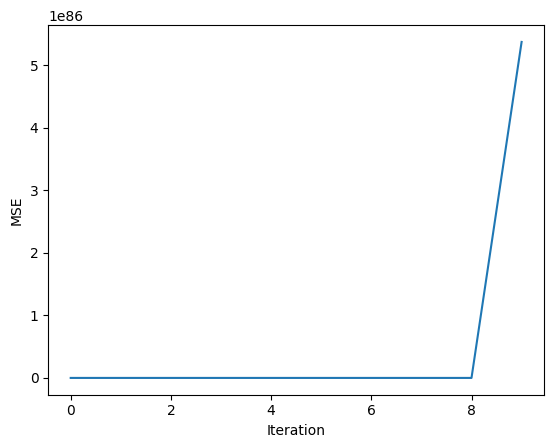

In [447]:
# Tracer l’MSE


plt.plot(MSE_list)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [448]:
# Donner l’erreur de ce modele.
print(MSE(X_train,Y_train,W))

1.2613273013249757e+96


## Partie 2 : Regression lineaire multiple

## Probleme 2 : Regression logistique

In [ ]:
def sigmoid(X,W):
    z=X@W
    return 1/(1+np.exp(-z))